<a href="https://colab.research.google.com/github/EdmarGCMS/DSWI/blob/main/Mineracao_Projeto_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#
# Mineração de Dados
# Este trabalho através da modelagem de técnicas de aprendizado de máquina, tem por objetivo
# a análise e identificação de locais para montagem de Fazendas de Energia Solar com
# Paíneis Fotovoltaícos Policristalinos Horizontais, sem o uso de dados de Irradiância Solar.
# A Base de Dados utilizada foi da https://www.kaggle.com/datasets:
# Machine_Learning_Modeling_of_Horizontal_Photovoltaics
#
# As Informações estão armazenadas em um arquivo CSV com 21.046 linhas e 17 colunas com 1 variável dependente (PolyPwr) e
# 16 variáveis independentes que são as seguintes, com as respectivas descrições por setor:
#
# GERAÇÃO:
#    1-PoliPwr: Potência Elétrica gerada pelos Painéis Solares no local em Watts - Variável Dependente;
# TEMPORAL:
#    2-Date - Data: Data de medição no formato ano-mes-dia;
#    3-Time - Tempo de medição de 15 em 15 minutos;
#    4-Month - Mês: Mês de medição;
#    5-Hour - Hora: Hora de medição no intervalo de 10 às 15:45 horas devido a melhor influencia do sol;
#    6-YRMODAHRI: Combinação de ano, mês, dia, hora e minuto;
#    7-Season - Temporada: Estação do ano: Verão/Inverno/Outono/Primavera;
# GEOGRÁFICO:
#    8-Location - Localização: Localização Geográfico do local de medição;
#    9-Latitude - Latitude: Latitude coordenadas em graus;
#    10-Longitude - Longitude: Longitude coordenadas em graus;
#    11-Altitude - Altitude: Altitude em Metros acima do nível do mar;
#    12-Pressure - Pressão: Pressão Atmosférico em Milibares;
# METEOROLÓGICO:
#    13-Humidity - Umidade: Nível de Umidade em Percentagem;
#    14-AmbientTemp - Temperatura do Ambiente do Local em Graus Celsius;
#    15-Wind.Speed - Velocidade do vento em km/h;
#    16-Visibility - Visibilidade com distância em Km;
#    17-Cloud.Ceiling - Altura de nuvem a cobrir o local em km.
#
# (1º) ALGORITMOS DE REGRESSÃO - É UM ALGORITMO DE APRENDIZADO SUPERVISIONADO PARA ENCONTRAR A RELAÇÃO ENTRE VARIÁVEIS INDEPENDENTES E UMA VARIÁVEL DEPENDENTE
#
# (PASSO 1) IMPORTANDO BIBLIOTECAS:
#
#
#                                   BIBLIOTECA UTILIZADAS
#
import numpy as np                  # Biblioteca NUMPY - com funções para se trabalhar com computação numérica e vetor n-dimensional
import pandas as pd                 # Biblioteca PANDAS - ferramenta com grande poder para manipulação e análise de dados
import seaborn as sns               # Biblioteca SEABORN - ferramenta para plotagem dos mais variados tipos de gráficos
import matplotlib.pyplot as plt     # Biblioteca MATPLOTLIB - ferramenta para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas
# %matplotlib inline                # Serve para fazer com que os gráficos gerados por nosso código sejam mostrados dentro do notebook, e não em uma nova janela
%matplotlib inline
from numpy import sqrt
from sklearn.model_selection import train_test_split        # Retornará os dados de treino, os dados de teste, as labels de treino e as labels de teste
#
#                                   ALGORITMOS DE REGRESSÃO UTILIZADOS
#
from sklearn.linear_model import LinearRegression           # Algoritmo de Regressão Linear
from sklearn.ensemble import (
RandomForestRegressor,                                      # Algoritmo Regressor Florestal Aleatório
GradientBoostingRegressor,                                  # Algoritmo Regressor de reforço de gradiente
VotingRegressor,
)
from sklearn.tree import DecisionTreeRegressor              # Algoritmo Regressor da árvore de decisão
#
#                                   MÉTRICAS PARA AVALIAÇÃO DOS ALGORITMOS UTILIZADOS
#
from sklearn.metrics import r2_score                        # Métricas Pontuação r2
from sklearn.metrics import mean_absolute_error             # Métrica Erro médio absoluto - MAE
from sklearn.metrics import mean_squared_error              # MétricaErro Quadrático Médio




# Nova seção

# Nova seção

In [ ]:
# (PASSO 2) LENDO O DATASET DA KAGGLE EM FORMATO CSV do Disco Rigido:
#
# df = pd.read_csv('./IA_FV_dataset.csv')

In [ ]:
# (PASSO 2) LENDO O DATASET DA KAGGLE EM FORMATO CSV do Drive do Colab:
#
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA_FV_dataset.csv')

Mounted at /content/drive


In [ ]:
# (PASSO 3) CHECANDO DADOS NULOS (ZERO):
#
df.isnull().sum()

,0
Location,0
Date,0
Time,0
Latitude,0
Longitude,0
Altitude,0
YRMODAHRMI,0
Month,0
Hour,0
Season,0


# Nova seção

In [ ]:
# (PASSO 4) LISTANDO CONTEÚDO RESUMIDO DO QUADRO DE DADOS DO DATASET AGORA ARMAZENADO EM DF
#
df


,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,USAFA,20180928,1530,38.95,-104.83,1947,2.018090e+11,9,15,Fall,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,USAFA,20180929,1300,38.95,-104.83,1947,2.018090e+11,9,13,Fall,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,USAFA,20180929,1400,38.95,-104.83,1947,2.018090e+11,9,14,Fall,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,USAFA,20180929,1500,38.95,-104.83,1947,2.018090e+11,9,15,Fall,6.63452,51.62163,12.47328,10,10.0,797.8,722


In [ ]:
# (PASSO 5) LISTANDO CONTEÚDO DAS COLUNAS PARA IDENTIFICAR O TIPO DO DADO  (STRING/NUMÉRICO)
# FOI IDENTICADO QUE AS COLUNAS LOCATION (Local do Site) E SEASON (Estaçaõ do Ano) SÃO STRING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [ ]:
# LISTANDO APENAS 5 PRIMEIROS DADOS STRING DA BASE DE DADOS
#
df_num = df.select_dtypes(include = ['object'])
df_num.head()

,Location,Season
0,Camp Murray,Winter
1,Camp Murray,Winter
2,Camp Murray,Winter
3,Camp Murray,Winter
4,Camp Murray,Winter


In [ ]:
# (PASSO 6) ELIMINANDO COLUNAS QUE NÃO SERÃO UTILIZADAS NA MODELAGEM
#

In [ ]:
# A COLUNA YRMODAHRMI (Combinação de Ano+Mês+Dia+Hora+Minuto) NÃO VAI SER UTILIZADA POIS ESTES CAMPOS JÁ EXISTEM E VAI SER REMOVIDA COM UM DROP
#
df.drop(['YRMODAHRMI'], axis='columns', inplace=True)

In [ ]:
# CONFIRMAÇÃO DA EXCLUSÃO A COLUNA YRMODAHRMI DA BASE DE DADOS
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   Month          21045 non-null  int64  
 7   Hour           21045 non-null  int64  
 8   Season         21045 non-null  object 
 9   Humidity       21045 non-null  float64
 10  AmbientTemp    21045 non-null  float64
 11  PolyPwr        21045 non-null  float64
 12  Wind.Speed     21045 non-null  int64  
 13  Visibility     21045 non-null  float64
 14  Pressure       21045 non-null  float64
 15  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 2.6+ MB


In [ ]:
# LISTANDO TODAS AS COLUNAS DA BASE DE DADOS
#
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp', 'PolyPwr',
       'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [ ]:
# (PASSO 7) TRANSFORMANDO COLUNAS QUE SÃO STRING EM NUMEROS COM CODIFICAÇÃO NUMÉRICA PARA NORMALIZAÇÃO
#

In [ ]:
# Codificação da coluna Location (Localização do Site das Placas) para transformar o tipo de string para numérico:
# Location = 1 ='Camp Murray' or 2 ='Grissom' or 3 ='Hill Weber' or 4 ='JDMT' or 5 ='Kahului' or 6 ='Malmstrom' or 7 ='March AFB' or 8 ='MNANG' or 9 ='Offutt' or 10 ='Peterson' or 11 ='Travis' or 12 ='USAFA'

In [ ]:
# Codificação da coluna Season (Estação Climática) para transformar o tipo de string para numérico:
# Season  = Winter 	1 	Spring	2	Summer	3 	Fall	4

In [ ]:
df['Location']=df['Location'].replace(['Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului', 'Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis', 'USAFA'],[1,2,3,4,5,6,7,8,9,10,11,12])

<ipython-input-15-114334055b76>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Location']=df['Location'].replace(['Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului', 'Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis', 'USAFA'],[1,2,3,4,5,6,7,8,9,10,11,12])


In [ ]:
df['Season']=df['Season'].replace(['Winter', 'Spring', 'Summer', 'Fall'],[1,2,3,4])

<ipython-input-16-4891e3955b76>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Season']=df['Season'].replace(['Winter', 'Spring', 'Summer', 'Fall'],[1,2,3,4])


In [ ]:
# Listagem das colunas para comprovação da transformação das strings em numeros
#
df

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,1,20171203,1145,47.11,-122.57,84,12,11,1,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,1,20171203,1315,47.11,-122.57,84,12,13,1,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,1,20171203,1330,47.11,-122.57,84,12,13,1,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,1,20171204,1230,47.11,-122.57,84,12,12,1,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,1,20171204,1415,47.11,-122.57,84,12,14,1,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,12,20180928,1530,38.95,-104.83,1947,9,15,4,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,12,20180929,1300,38.95,-104.83,1947,9,13,4,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,12,20180929,1400,38.95,-104.83,1947,9,14,4,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,12,20180929,1500,38.95,-104.83,1947,9,15,4,6.63452,51.62163,12.47328,10,10.0,797.8,722


In [ ]:
df.dtypes

,0
Location,int64
Date,int64
Time,int64
Latitude,float64
Longitude,float64
Altitude,int64
Month,int64
Hour,int64
Season,int64
Humidity,float64


In [ ]:
# (PASSO 8) PLOTANDO GRÁFICO DE BARRAS (VISUALIZAR CURVA) DAS VARIAVEIS INDEPENDENTES X VARIÁVEL DEPENDENTE (POTÊNCIA GERADA)
#

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Location
#
print(df['Location'].describe())

count    21045.000000
mean         7.091518
std          3.600643
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         12.000000
Name: Location, dtype: float64


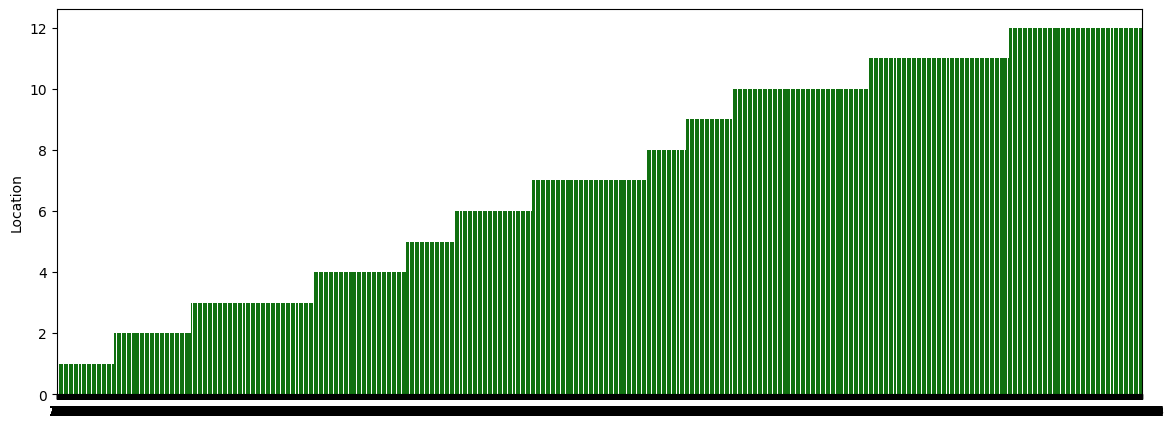

In [22]:
plt.figure(figsize=(14, 5))
sns.barplot(df['Location'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Date
#
print(df['Date'].describe())

count    2.104500e+04
mean     2.017720e+07
std      4.579585e+03
min      2.017052e+07
25%      2.017111e+07
50%      2.018032e+07
75%      2.018062e+07
max      2.018100e+07
Name: Date, dtype: float64


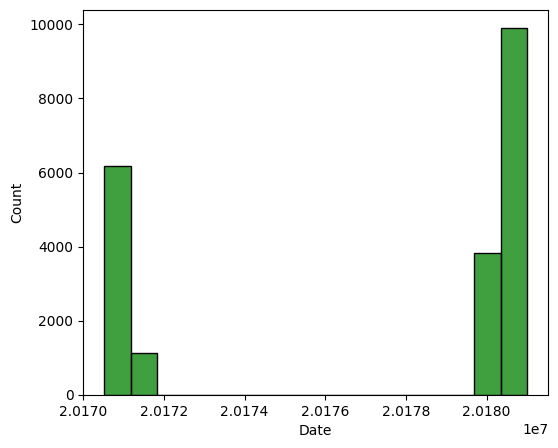

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Date'], color='g');

In [23]:
# DADOS ESTATITISCOS DA COLUNA Time
#
print(df['Time'].describe())

count    21045.000000
mean      1267.483725
std        167.602767
min       1000.000000
25%       1100.000000
50%       1300.000000
75%       1400.000000
max       1545.000000
Name: Time, dtype: float64


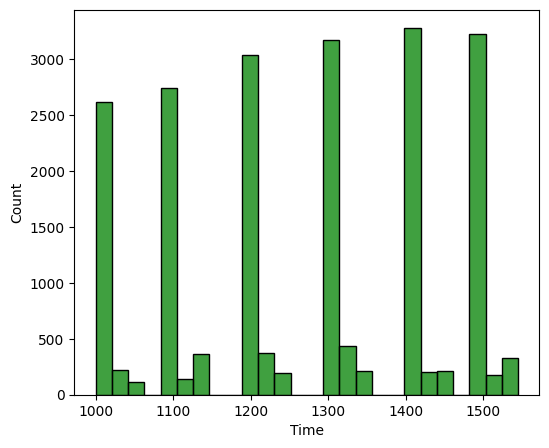

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Time'], color='g');
# O histograma ficou melhor que a barra

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Latitude
#
print(df['Latitude'].describe())

count    21045.000000
mean        38.213823
std          6.323761
min         20.890000
25%         38.160000
50%         38.950000
75%         41.150000
max         47.520000
Name: Latitude, dtype: float64


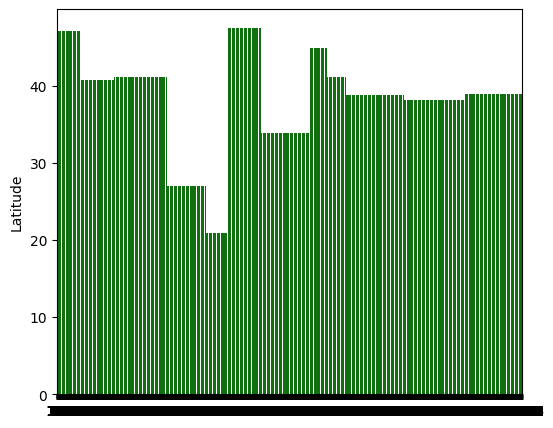

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(df['Latitude'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Longitude
#
print(df['Longitude'].describe())

count    21045.000000
mean      -108.593678
std         16.364130
min       -156.440000
25%       -117.260000
50%       -111.180000
75%       -104.710000
max        -80.110000
Name: Longitude, dtype: float64


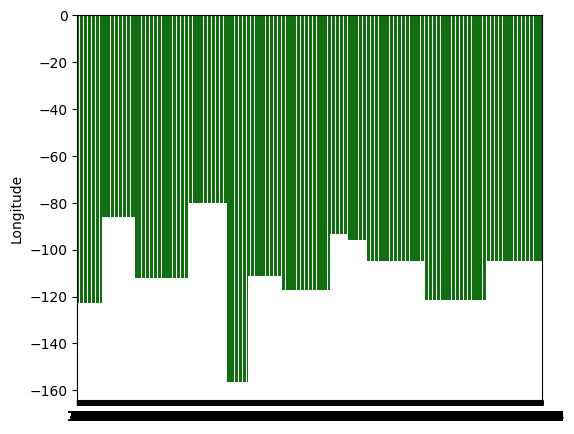

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(df['Longitude'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Altitude
#
print(df['Altitude'].describe())

count    21045.000000
mean       798.843668
std        770.681794
min          1.000000
25%          2.000000
50%        458.000000
75%       1370.000000
max       1947.000000
Name: Altitude, dtype: float64


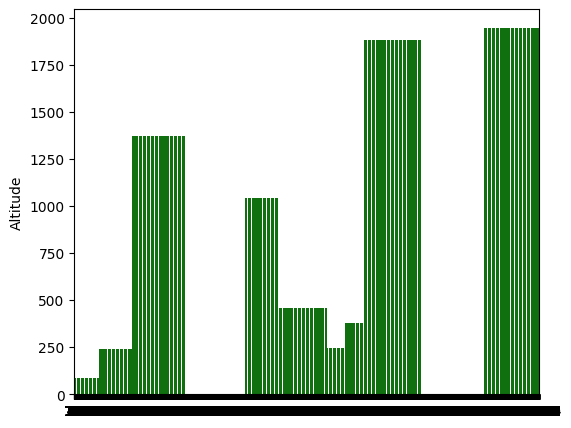

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(df['Altitude'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA Month
#
print(df['Month'].describe())

count    21045.000000
mean         6.565883
std          2.983958
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: Month, dtype: float64


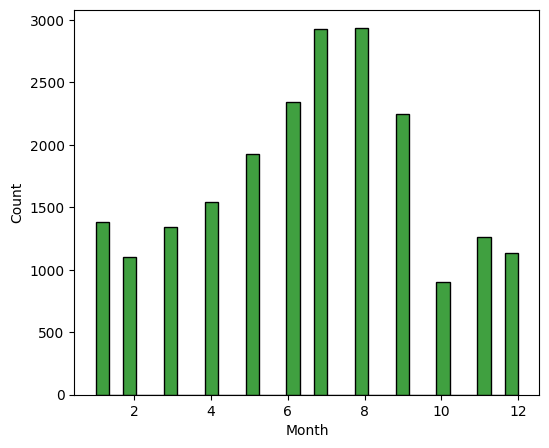

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Month'], color='g');
# O Histograma ficou melhor que a barra

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Hour
#
print(df['Hour'].describe())

count    21045.000000
mean        12.627845
std          1.672952
min         10.000000
25%         11.000000
50%         13.000000
75%         14.000000
max         15.000000
Name: Hour, dtype: float64


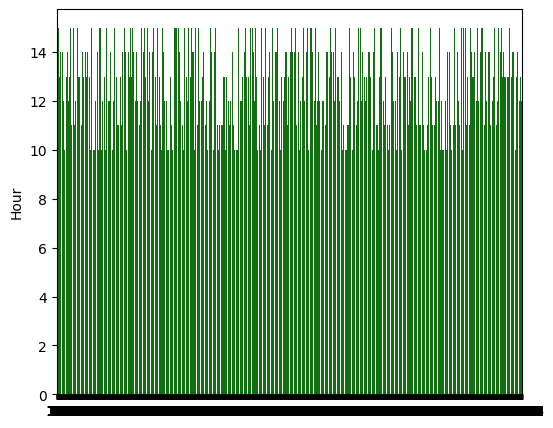

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(df['Hour'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Humidity
#
print(df['Humidity'].describe())

count    21045.000000
mean        37.121941
std         23.823011
min          0.000000
25%         17.529300
50%         33.123780
75%         52.593990
max         99.987790
Name: Humidity, dtype: float64


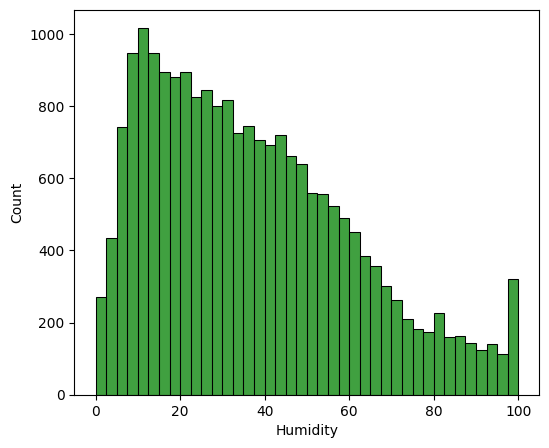

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Humidity'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA AmbientTemp
#
print(df['AmbientTemp'].describe())

count    21045.000000
mean        29.285117
std         12.366820
min        -19.981770
25%         21.915280
50%         30.289150
75%         37.474670
max         65.738370
Name: AmbientTemp, dtype: float64


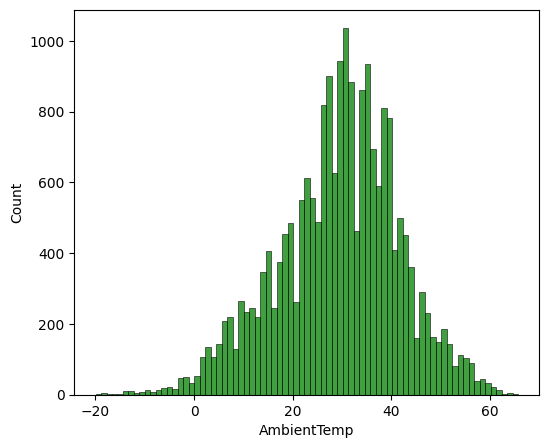

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['AmbientTemp'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Wind.Speed
#
print(df['Wind.Speed'].describe())

count    21045.000000
mean        10.318318
std          6.385030
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         49.000000
Name: Wind.Speed, dtype: float64


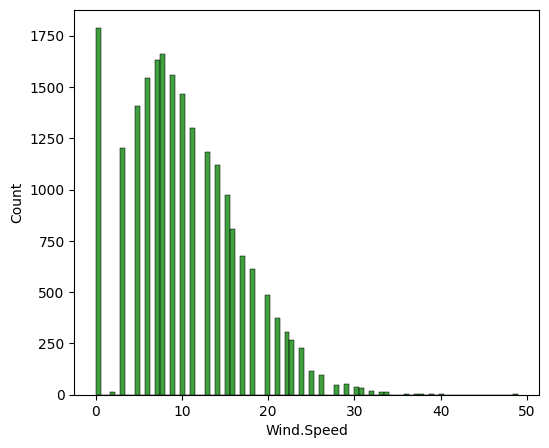

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Wind.Speed'], color='g');
# O Histograma ficou melhor que a barra

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Visibility
#
print(df['Visibility'].describe())

count    21045.000000
mean         9.700071
std          1.351949
min          0.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: Visibility, dtype: float64


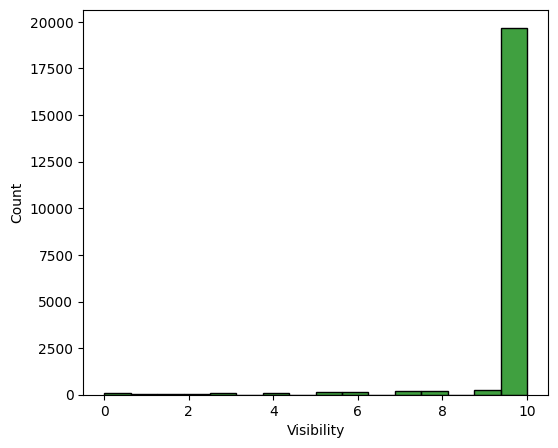

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Visibility'], color='g');
# O Histograma ficou melhor que a Barra


In [ ]:
# DADOS ESTATITISCOS DA COLUNA Pressure
#
print(df['Pressure'].describe())

count    21045.000000
mean       925.944747
std         85.215659
min        781.700000
25%        845.500000
50%        961.100000
75%       1008.900000
max       1029.500000
Name: Pressure, dtype: float64


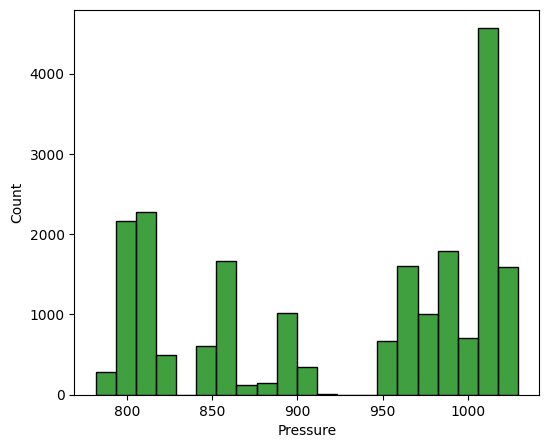

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Pressure'], color='g');
# O Histograma ficou melhor que a Barra

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Cloud.Ceiling
#
print(df['Cloud.Ceiling'].describe())

count    21045.000000
mean       515.966785
std        301.903379
min          0.000000
25%        140.000000
50%        722.000000
75%        722.000000
max        722.000000
Name: Cloud.Ceiling, dtype: float64


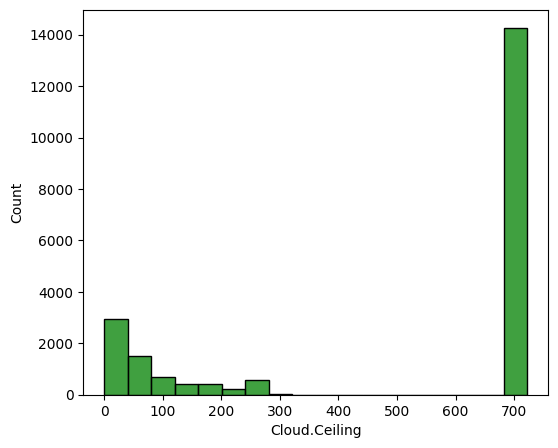

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Cloud.Ceiling'], color='g');
# O Histograma ficou melhor que a Barra

In [ ]:
# DADOS ESTATITISCOS DA COLUNA Season
#
print(df['Season'].describe())

count    21045.000000
mean         2.636731
std          0.997188
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Season, dtype: float64


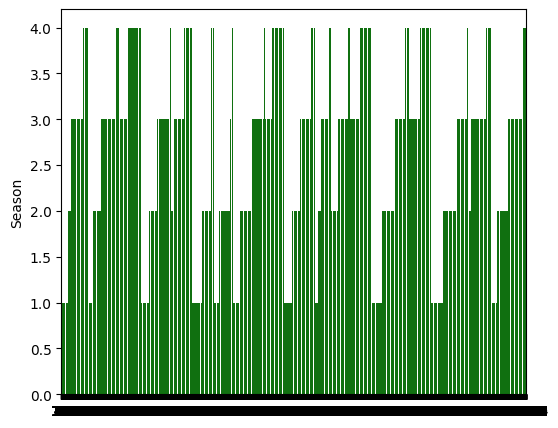

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(df['Season'], color='g');

In [ ]:
# DADOS ESTATITISCOS DA COLUNA PolyPwr
#
print(df['PolyPwr'].describe())

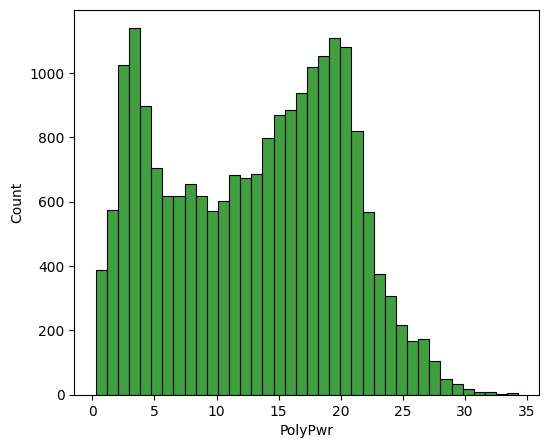

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(df['PolyPwr'], color='g');

In [ ]:
# (PASSO 9) PLOTANDO O GRÁFICO DE DISPERSÃO DAS VARIAVEIS INDEPENDENTES X VARIÁVEL DEPENDENTE (POTÊNCIA GERADA)
#

Text(0.5, 0, 'Localização')

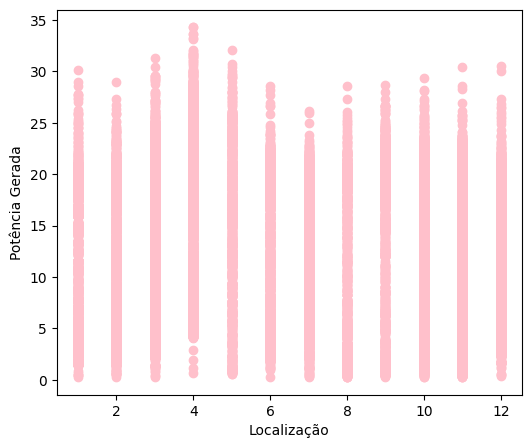

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Location, df.PolyPwr, color = 'pink')
plt.ylabel('Potência Gerada')
plt.xlabel('Localização')

Text(0.5, 0, 'Pressão Barométrica')

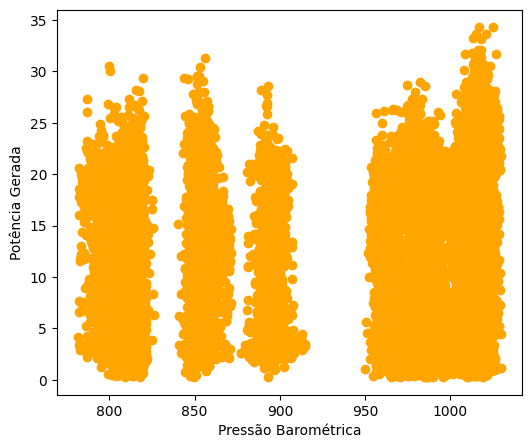

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Pressure, df.PolyPwr, color = 'orange')
plt.ylabel('Potência Gerada')
plt.xlabel('Pressão Barométrica')

Text(0.5, 0, 'Estação do Ano')

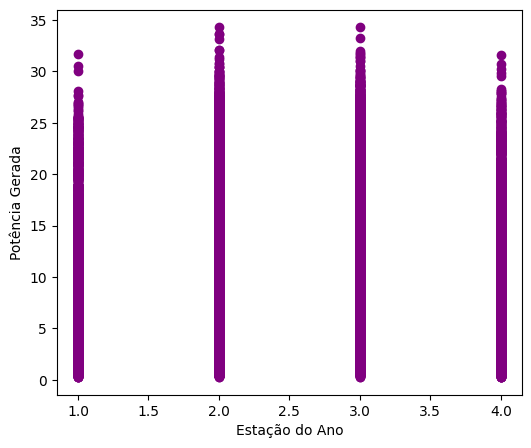

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Season, df.PolyPwr, color = 'purple')
plt.ylabel('Potência Gerada')
plt.xlabel('Estação do Ano')

Text(0.5, 0, 'Tempo de Mediçao 15 em 15 Minutos')

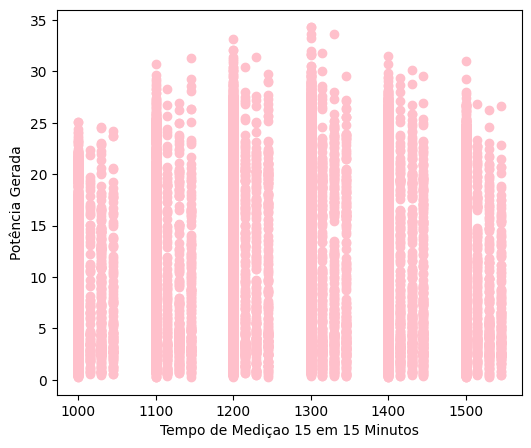

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Time, df.PolyPwr, color = 'pink')
plt.ylabel('Potência Gerada')
plt.xlabel('Tempo de Mediçao 15 em 15 Minutos')

Text(0.5, 0, 'Hora da Geração')

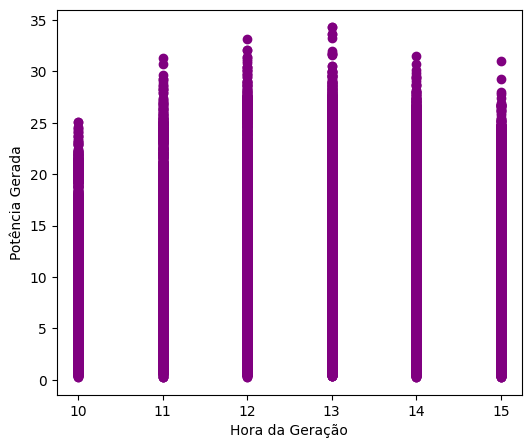

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Hour, df.PolyPwr, color = 'purple')
plt.ylabel('Potência Gerada')
plt.xlabel('Hora da Geração')

Text(0.5, 0, 'Mês da Geração')

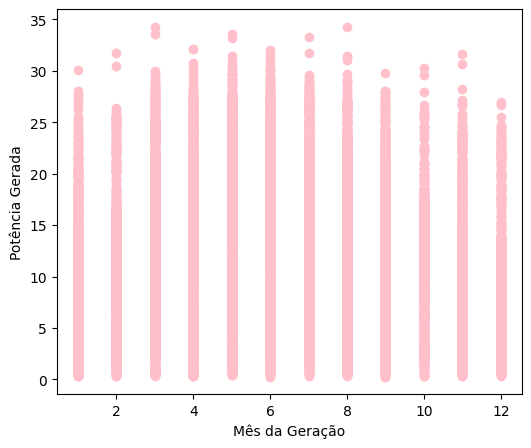

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Month, df.PolyPwr, color = 'pink')
plt.ylabel('Potência Gerada')
plt.xlabel('Mês da Geração')

Text(0.5, 0, 'Latitude - Coord. Geografica (Equador - varia 0º a 90º Norte ou Sul)')

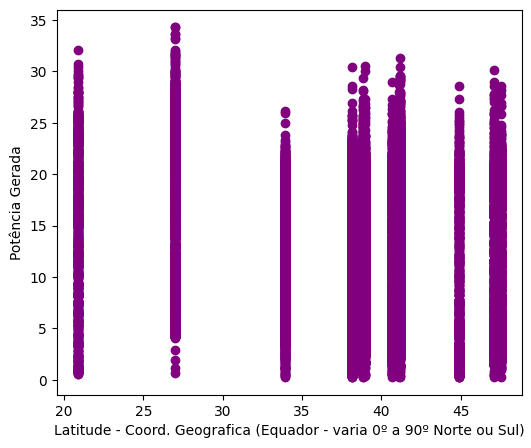

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Latitude, df.PolyPwr, color = 'purple')
plt.ylabel('Potência Gerada')
plt.xlabel('Latitude - Coord. Geografica (Equador - varia 0º a 90º Norte ou Sul)')

Text(0.5, 0, 'Longitude - Coord. Geográfica (Meridiano - varia 0º a 180º leste ou oeste.)')

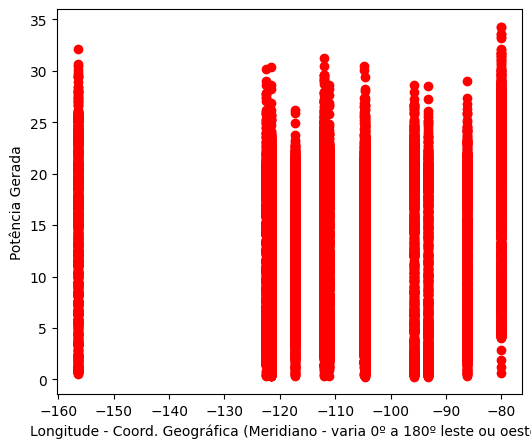

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Longitude, df.PolyPwr, color = 'red')
plt.ylabel('Potência Gerada')
plt.xlabel('Longitude - Coord. Geográfica (Meridiano - varia 0º a 180º leste ou oeste.)')

Text(0.5, 0, 'Altitude acima do nível do mar')

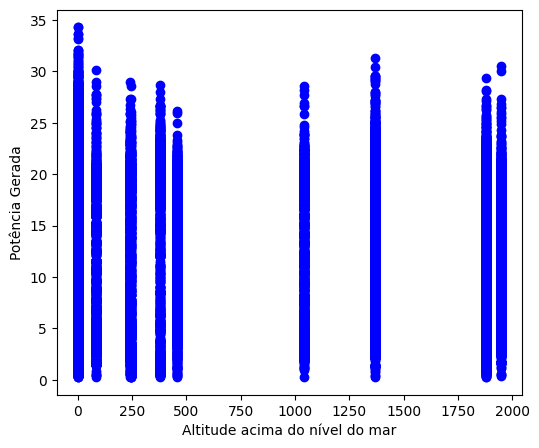

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Altitude, df.PolyPwr, color = 'blue')
plt.ylabel('Potência Gerada')
plt.xlabel('Altitude acima do nível do mar')

Text(0.5, 0, 'Humidade relativa do ar')

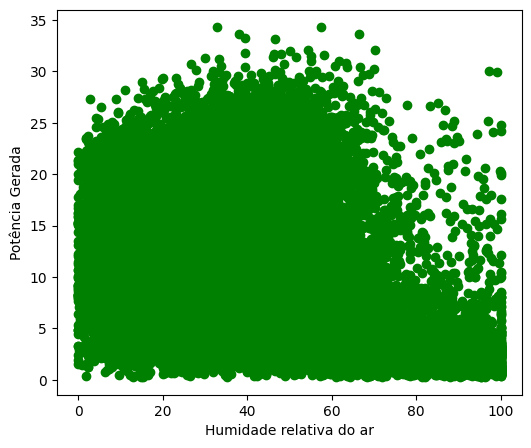

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Humidity, df.PolyPwr, color = 'green')
plt.ylabel('Potência Gerada')
plt.xlabel('Humidade relativa do ar')


Text(0.5, 0, 'Temperatura Ambiente do Local da Geração')

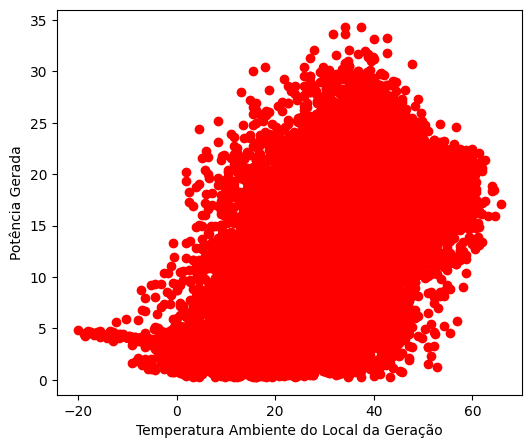

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.AmbientTemp, df.PolyPwr, color = 'red')
plt.ylabel('Potência Gerada')
plt.xlabel('Temperatura Ambiente do Local da Geração')

Text(0.5, 0, 'Visibilidade: Em metros que um objecto pode ser avistado')

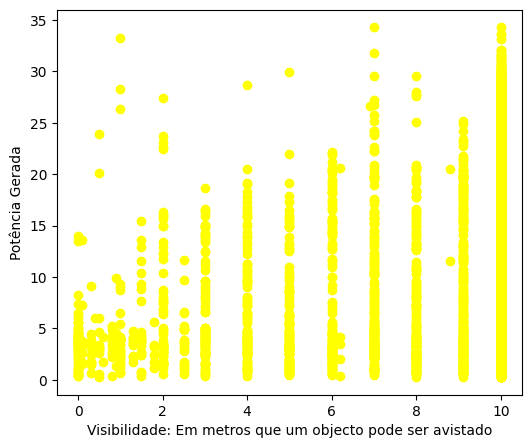

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Visibility, df.PolyPwr, color = 'yellow')
plt.ylabel('Potência Gerada')
plt.xlabel('Visibilidade: Em metros que um objecto pode ser avistado')

Text(0.5, 0, 'Presão Barométrica')

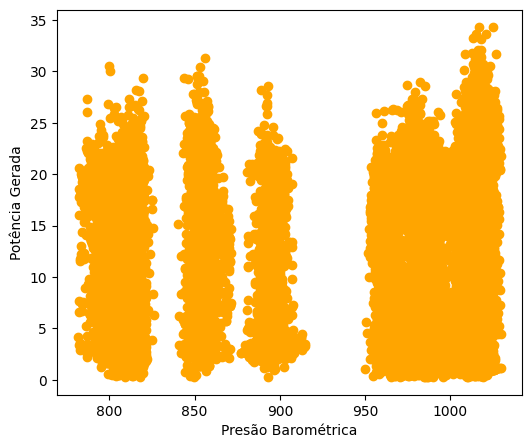

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.Pressure, df.PolyPwr, color = 'orange')
plt.ylabel('Potência Gerada')
plt.xlabel('Presão Barométrica')

Text(0.5, 0, 'Potência Gerada')

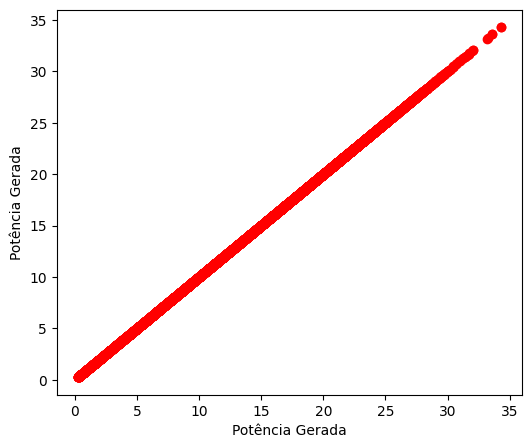

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df.PolyPwr, df.PolyPwr, color = 'red')
plt.ylabel('Potência Gerada')
plt.xlabel('Potência Gerada')

In [ ]:
# (PASSO 10) PLOTANDO O GRÁFICO DA DENSIDADE DA VARIÁVEL DEPENDENTE (POTÊNCIA GERADA)
#

<ipython-input-113-fa75c56babc3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df.PolyPwr), bins=100)


<Axes: xlabel='PolyPwr', ylabel='Density'>

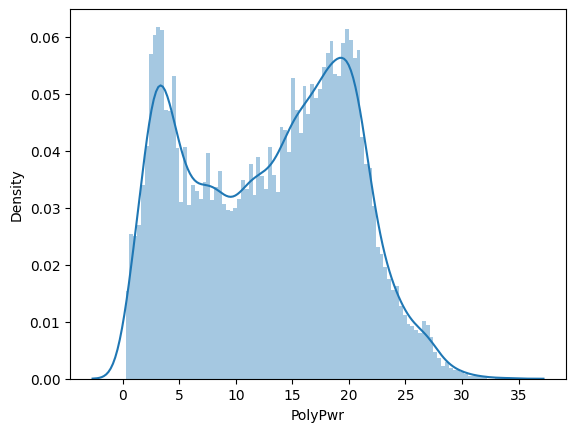

In [ ]:
# Curva da Potência Gerada pelas Placas FV
#
sns.distplot((df.PolyPwr), bins=100)

In [ ]:
print('Skewness : %f' % df['PolyPwr'].skew())
print('Kurtosis : %f' % df['PolyPwr'].kurt())

Skewness : -0.035347
Kurtosis : -1.082213


In [ ]:
# Skewness (-0.035347) é o grau de distorção da curva simétrica em forma de sino ou da distribuição normal, que neste caso está Assimétrica

In [ ]:
media_potencia = df.PolyPwr.mean()
media_potencia

12.978582728439058

In [ ]:
# A curva de distribuição acima mostra uma assimetria positiva, ou seja, o pico da curva de distribuição é maior que o valor médio.
# Isto pode ser uma indicação de que muitos locais estão gerando uma potência maior que valor médio.

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

In [ ]:
# Desnecessário - Mais por segurança
#
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,1,20171203,1145,47.11,-122.57,84,12,11,1,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,1,20171203,1315,47.11,-122.57,84,12,13,1,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,1,20171203,1330,47.11,-122.57,84,12,13,1,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,1,20171204,1230,47.11,-122.57,84,12,12,1,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,1,20171204,1415,47.11,-122.57,84,12,14,1,54.80347,16.85471,6.57939,3,3.0,1023.7,9


Observamos a Distribuição de todos os recursos, apenas com os dados numéricos

In [ ]:
# (PASSO 11) VERIFICANDO CORRELACIONAMENTO DAS VARIÁVEIS INDEPENDENTE COM A VARIÁVEL DEPENDENTE (POTÊNCIA GERADA)
#

In [ ]:
#
# Se há valores correlacionados podemos usar algoritmos de regressão com uma variavel dependente e varias independentes
#
df_num_corr = df_num.corr()['PolyPwr'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("Há valores {} fortemente correlacionados com a Potencia das Placas FV:\n{}".format(len(golden_features_list), golden_features_list))

Há valores 6 fortemente correlacionados com a Potencia das Placas FV:
PolyPwr        1.000000
AmbientTemp    0.580395
Visibility     0.204905
Season         0.136054
Latitude      -0.253049
Humidity      -0.397819
Name: PolyPwr, dtype: float64


In [ ]:
# PLOTAGEM DOS GRAFICOS DAS VARIÁVEIS CORRELACIONADAS
#

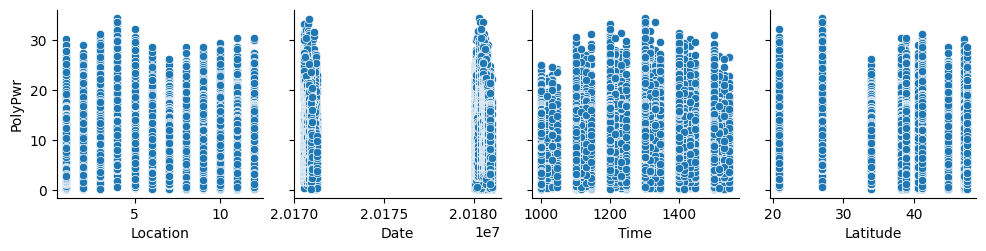

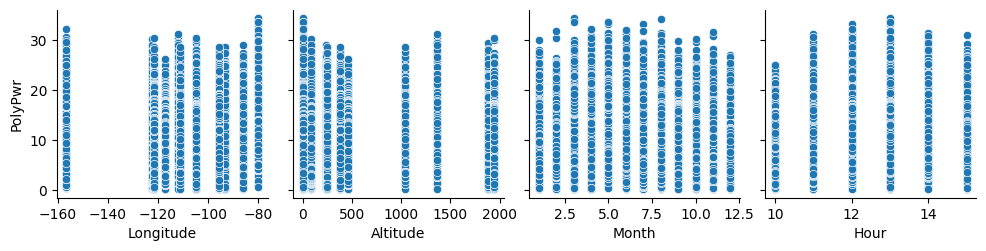

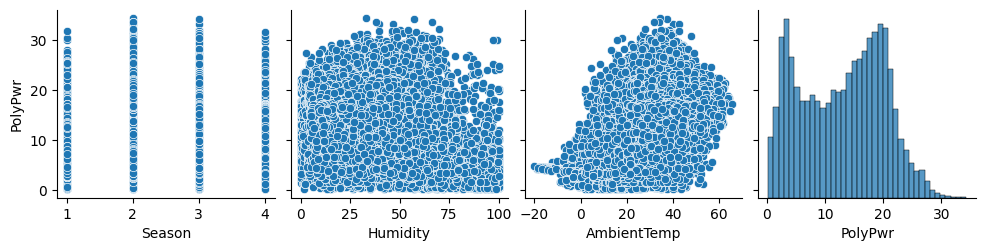

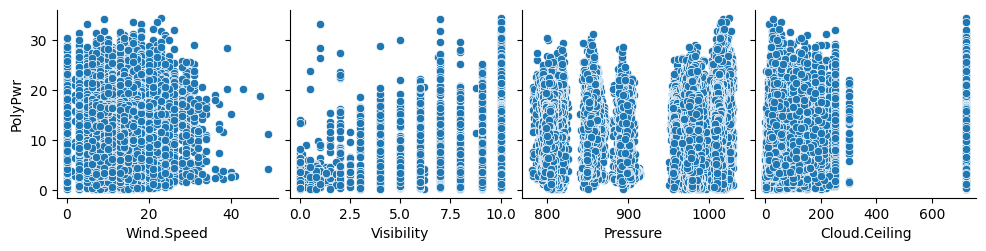

In [ ]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['PolyPwr'])

In [ ]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 6):
    tmpDf = df_num[[df_num.columns[i], 'PolyPwr']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['PolyPwr'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

       Humidity: -0.4005243813435717
       Latitude: -0.25304921231504807
       Altitude: -0.07758511492940615
          Month: -0.024980565858024436
       Location: -0.023521550132559375
      Longitude: 0.012445574412541214
           Date: 0.0195851809497846
           Time: 0.08099081405291138
           Hour: 0.09493472687649483
         Season: 0.1360540553908889


<ipython-input-124-241b7c057f67>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['PolyPwr'][0] for feature in individual_features_df}


Removendo os valores = 0 e refazendo o processo de localização de valores correlacionados, localizamos outros valore correlacionado



In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.40]
print("Existe uma {} forte correlçao de valores com a Potência gerada pela Placa FV = PolyPwr:\n{}".format(len(golden_features_list), golden_features_list))

Existe uma 1 forte correlçao de valores com a Potência gerada pela Placa FV = PolyPwr:
['Humidity']


In [ ]:
# GRÁFICO DE CORRELACIONAMTO
#

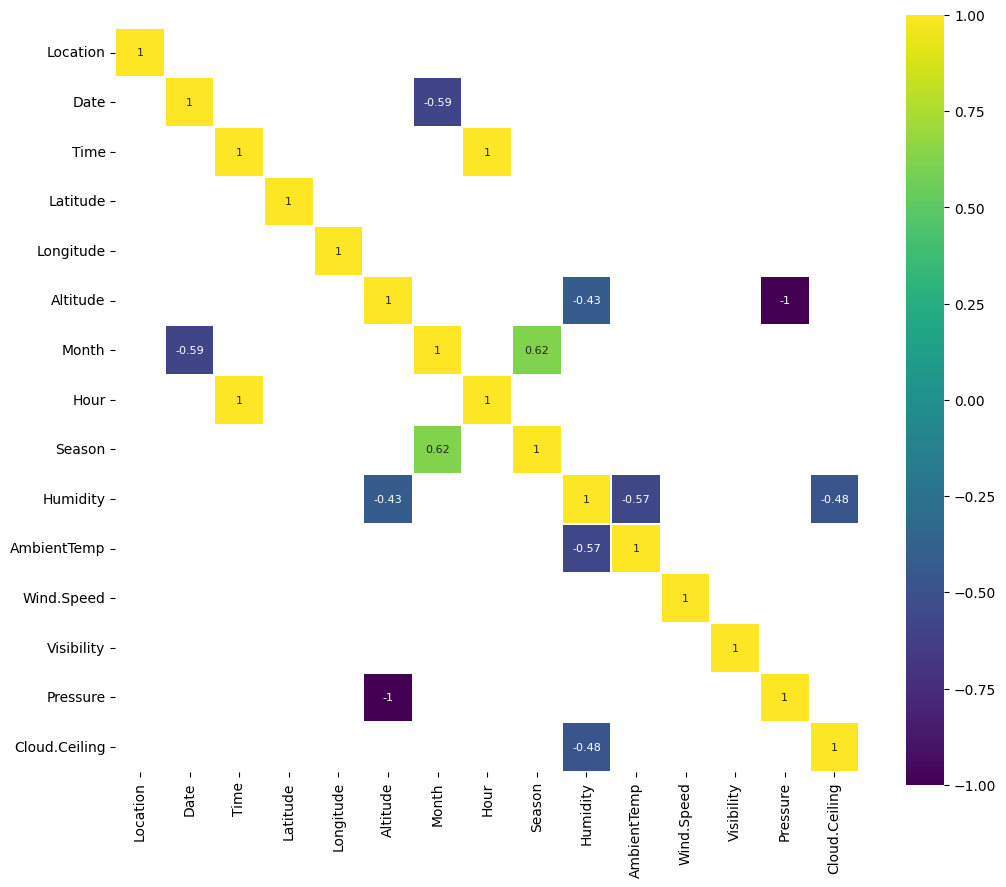

In [ ]:
corr = df_num.drop('PolyPwr', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
# COEFICIENTE DE CORRELAÇÃO LINEAR (r) é a medida do grau de dependência linear entre duas variáveis que sempre será -1 =< r =< 1 :
# r = +1: Relação linear perfeita e positiva entre as duas variáveis
# r = 0: Inexistência de relaão linear entre as duas variáveis
# r = -1: Relação linear perfeita e negativa entre as duas variáveis
# r > 0: Relação linear positiva entre as duas variáveis
# r > 0: Relação linear negativa entre as duas variáveis
# (A) Existe uma correlação OPOSTA entre a Altitude local e a Pressão Barométrica pois ambos tem valor = -1
# (B) A correlção NÃO É FORTE entre as variáveis pois todas estão abaixo de 0.60

In [ ]:
df

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,1,20171203,1145,47.11,-122.57,84,12,11,1,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,1,20171203,1315,47.11,-122.57,84,12,13,1,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,1,20171203,1330,47.11,-122.57,84,12,13,1,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,1,20171204,1230,47.11,-122.57,84,12,12,1,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,1,20171204,1415,47.11,-122.57,84,12,14,1,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,12,20180928,1530,38.95,-104.83,1947,9,15,4,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,12,20180929,1300,38.95,-104.83,1947,9,13,4,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,12,20180929,1400,38.95,-104.83,1947,9,14,4,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,12,20180929,1500,38.95,-104.83,1947,9,15,4,6.63452,51.62163,12.47328,10,10.0,797.8,722


In [ ]:
# GRÁFICO COM VARIÁVEL INDEPENDENTE QUALQUER PARA MOSTRAR A VARIÁVEL POLYPWR (POTÊNCIA)
#

In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.4]
print("Existe {} forte correlçao de valores com a Velocidade do Vento = Wind.Speed:\n{}".format(len(golden_features_list), golden_features_list))

Existe 1 forte correlçao de valores com a Velocidade do Vento = Wind.Speed:
['Humidity']


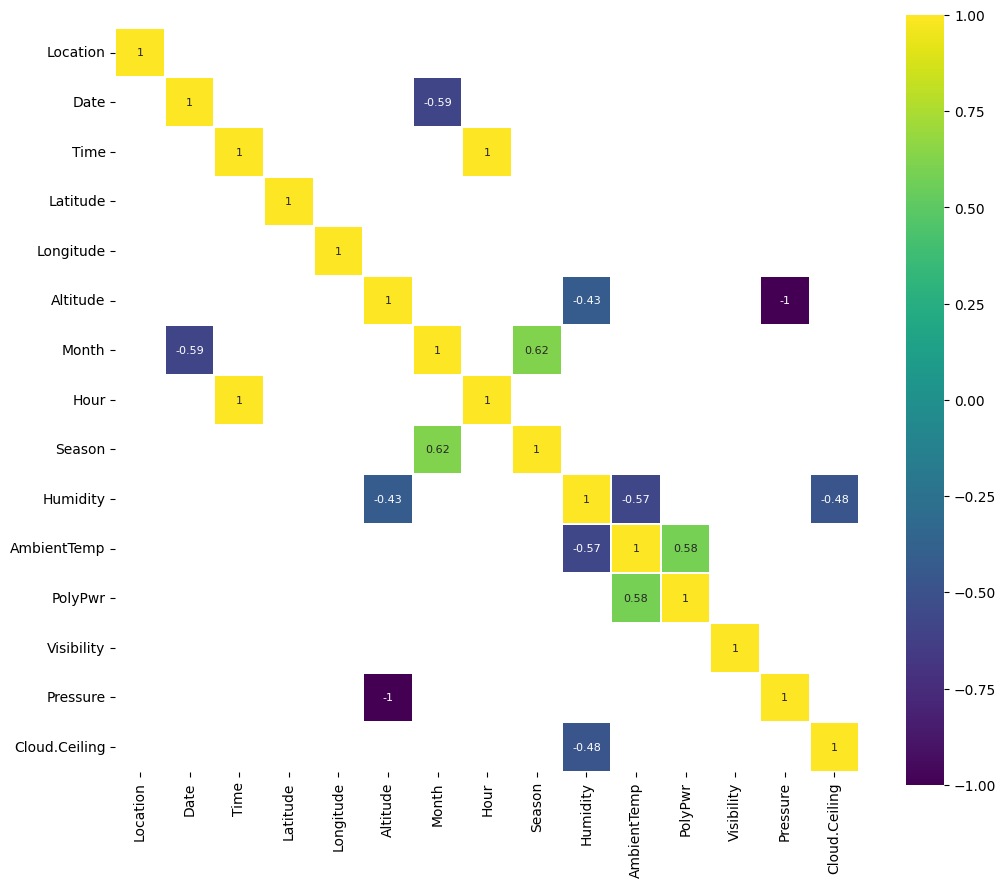

In [ ]:
corr = df_num.drop('Wind.Speed', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
# (PASSO 12) NORMALIZANDO AS VARÁVEIS
#

In [ ]:
# MOSTRANDO O MAIOR VALOR DE CADA VARIÁVEL PARA NORMALIZAÇÃO E ANÁLISE DAS MÉTRICAS A POSTERIORE
#

In [ ]:
# Para achar o maior valor (Maximo) de cada coluna APÓS a NORMALIZAR para o maior = 1
maximo_df = df.max()
maximo_df


,0
Location,1.200000e+01
Date,2.018100e+07
Time,1.545000e+03
Latitude,4.752000e+01
Longitude,-8.011000e+01
Altitude,1.947000e+03
Month,1.200000e+01
Hour,1.500000e+01
Season,4.000000e+00
Humidity,9.998779e+01


In [ ]:
# Dividindo cada coluna a partir da primeira para NORMALIZAR os dados a partir da última linha (-1) de cada coluna
#
df_normal = df / df.iloc[-1]

In [ ]:
#
# Mostrar Dataset Normalizado
#
display (df_normal)

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,0.083333,0.999514,0.817857,1.209499,1.169226,0.043143,1.2,0.785714,0.25,3.618648,0.391880,0.379485,0.333333,1.0,1.261358,6.563636
1,0.083333,0.999514,0.939286,1.209499,1.169226,0.043143,1.2,0.928571,0.25,4.279729,0.294284,0.384963,0.000000,1.0,1.262232,0.209091
2,0.083333,0.999514,0.950000,1.209499,1.169226,0.043143,1.2,0.928571,0.25,4.145405,0.470464,0.698474,0.333333,1.0,1.262606,0.290909
3,0.083333,0.999515,0.878571,1.209499,1.169226,0.043143,1.2,0.857143,0.25,3.419189,0.315674,0.258489,0.333333,0.2,1.278582,0.054545
4,0.083333,0.999515,1.010714,1.209499,1.169226,0.043143,1.2,1.000000,0.25,2.426757,0.513244,1.028460,0.200000,0.3,1.277708,0.081818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,1.000000,0.999996,1.092857,1.000000,1.000000,1.000000,0.9,1.071429,1.00,0.516757,1.316250,1.531283,0.933333,1.0,1.001373,6.563636
21041,1.000000,0.999996,0.928571,1.000000,1.000000,1.000000,0.9,0.928571,1.00,0.807027,0.882547,1.702263,0.866667,1.0,0.997504,6.563636
21042,1.000000,0.999996,1.000000,1.000000,1.000000,1.000000,0.9,1.000000,1.00,0.687297,1.019857,1.288788,0.666667,1.0,0.996505,6.563636
21043,1.000000,0.999996,1.071429,1.000000,1.000000,1.000000,0.9,1.071429,1.00,0.293784,1.571933,1.949766,0.666667,1.0,0.995756,6.563636


In [ ]:
# (PASSO 13) MONTANDO DADOS NORMALIZADOS PARA TREINO E TESTE DOS ALGORITMOS
#

In [ ]:
# Montando as variaveis independentes e a variável alvo dependente para realizar treinamento e teste nos Algoritmos a serem modelados
#
x = df_normal[['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']]
y = df_normal['PolyPwr']

In [ ]:
# Montando o TESTE com 30% e o TREINO com 70%
#
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30)

In [ ]:
# (PASSO 14) 1 - LINE REGRESSION - MODELANDO DADOS NORMALIZADOS
#

In [ ]:
# TREINANDO
#
LineReg = LinearRegression()
LineReg .fit(x_train, y_train)

LinearRegression()

In [ ]:
# PREVENDO COM O TESTE
#
y_predict=LineReg.predict(x_test)
print(y_predict)
print(y_test)

[2.50234432 2.66021035 2.94828956 ... 2.41320394 2.38352803 2.19322025]
17900    2.272062
20579    2.867696
1723     3.192726
7825     0.467429
2601     2.492219
           ...   
12382    3.220918
3391     0.529028
4163     3.806853
3282     2.905709
10662    2.122359
Name: PolyPwr, Length: 6314, dtype: float64


In [ ]:
# MÉTRICA  RMSE e r2 e MAE sobre a Regressão Linear
#

In [ ]:
y_prediction = LineReg.predict(x_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
mae = mean_absolute_error(y_test, y_prediction)
r2score = r2_score(y_test, y_prediction)

In [ ]:
print('RMSE = ', RMSE)
print('MAE = ', mae)
print('R2 Score = ', r2_score)

RMSE =  0.80415350884701
MAE =  0.6298680122693666
R2 Score =  <function r2_score at 0x78b1ce386ef0>


Text(0.5, 1.0, 'Regressão Linear - Predição para os dados de teste')

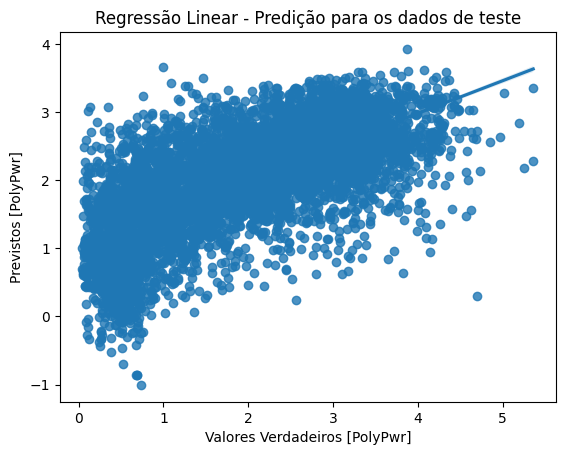

In [ ]:
sns.regplot(x=y_test, y = y_predict)
plt.xlabel('Valores Verdadeiros [PolyPwr]')
plt.ylabel('Previstos [PolyPwr]')
plt.title('Regressão Linear - Predição para os dados de teste')

<ipython-input-148-15a9dbbc2570>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test, y_predict),bins=100)


<Axes: ylabel='Density'>

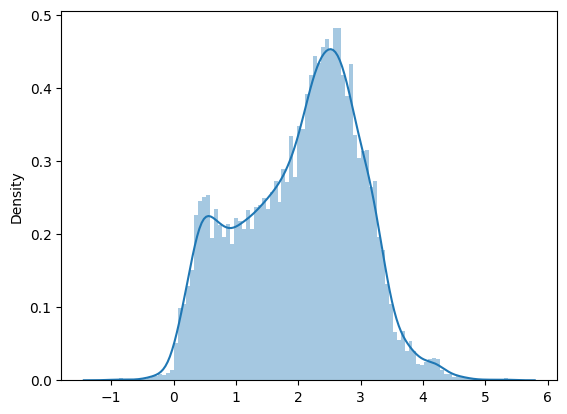

In [ ]:
# Curva de Predição da Potência das Placas FV
#
sns.distplot((y_test, y_predict),bins=100)

A CURVA NÃO É APROXIMADAMENTE NORMAL POIS TEM DOIS PICOS E NÃO TEM SIMETRIA

In [ ]:
# (PASSO 15) 2 - DECISION TREE REGRESSION - MODELANDO DADOS NORMALIZADOS
#

In [ ]:
max_depth = [5,10,15,20,25,30,35,40,45,50]
RMSE = []
mae = []
r2score = []
from math import sqrt

In [ ]:
for n in max_depth:
    regressor = DecisionTreeRegressor(max_depth = n, random_state = 100)
    regressor.fit(x_train, y_train)
    y_prediction = regressor.predict(x_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction)))
    mae.append(mean_absolute_error(y_test, y_prediction))
    r2score.append(r2_score(y_test, y_prediction))

In [ ]:
DTRegressor_results = pd.DataFrame({'max_depth':max_depth,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})

In [ ]:
print(DTRegressor_results.round(2))

   max_depth  RMSE   MAE  r2score
0          5  0.75  0.56     0.54
1         10  0.75  0.50     0.54
2         15  0.82  0.51     0.45
3         20  0.86  0.53     0.39
4         25  0.87  0.54     0.38
5         30  0.87  0.54     0.38
6         35  0.88  0.54     0.37
7         40  0.88  0.54     0.37
8         45  0.88  0.54     0.37
9         50  0.88  0.54     0.37


In [ ]:
# O modelo de melhor ajuste neste caso tem um r2score de 0,53 e MAE de 0.57 com max_profundidade = 10.

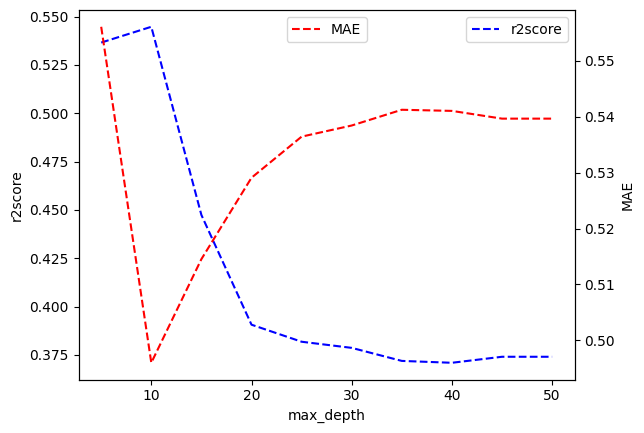

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(DTRegressor_results['max_depth'], DTRegressor_results['r2score'], 'b--')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(DTRegressor_results['max_depth'], DTRegressor_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center")
plt.show()

In [ ]:
# Valor verdadeiro vs. valor previsto para o modelo de regressão de árvore de decisão mais adequado

Text(0.5, 1.0, 'Regressão da Árvore de Decisão - Previsão para os dados de Testes')

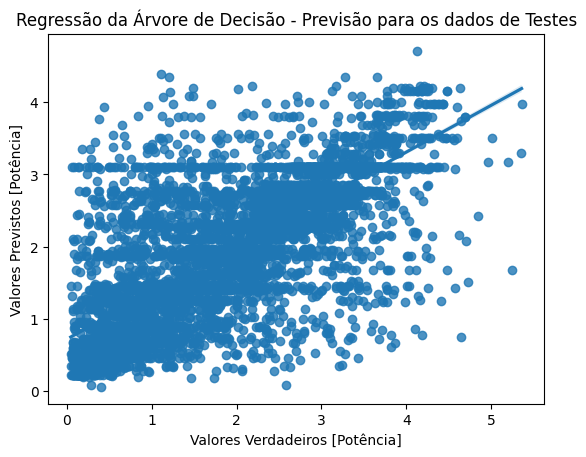

In [ ]:
sns.regplot(x=y_test, y=  DecisionTreeRegressor(max_depth = 10, random_state = 100).fit(x_train, y_train).predict(x_test))
plt.xlabel('Valores Verdadeiros [Potência]')
plt.ylabel('Valores Previstos [Potência]')
plt.title('Regressão da Árvore de Decisão - Previsão para os dados de Testes')

In [ ]:
# (PASSO 16) 3 - RANDOM FOREST REGRESSION - MODELANDO DADOS NORMALIZADOS
#

In [ ]:
n_estimators = [5,10,15,20,25,30, 35, 40, 45, 50]
RMSE = []
mae = []
r2score = []
for n in n_estimators:
    regressor = RandomForestRegressor(n_estimators = n, random_state = 100)
    regressor.fit(x_train, y_train)
    y_prediction = regressor.predict(x_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction)))
    mae.append(mean_absolute_error(y_test, y_prediction))
    r2score.append(r2_score(y_test, y_prediction))

In [ ]:
# Demorou 1 minutos e 17 segundos para processar os erros

In [ ]:
RFRegression_results = pd.DataFrame({'n_estimators':n_estimators,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})
print(RFRegression_results.round(3))

   n_estimators   RMSE    MAE  r2score
0             5  0.699  0.455    0.601
1            10  0.663  0.433    0.641
2            15  0.653  0.426    0.652
3            20  0.648  0.422    0.658
4            25  0.646  0.421    0.659
5            30  0.644  0.419    0.662
6            35  0.642  0.417    0.664
7            40  0.641  0.416    0.664
8            45  0.642  0.417    0.664
9            50  0.642  0.417    0.664


In [ ]:
# O modelo de melhor ajuste neste caso tem um RME de 0.643 e r2score de 0,667 e MAE de 0,421 com n_estimators = 50.


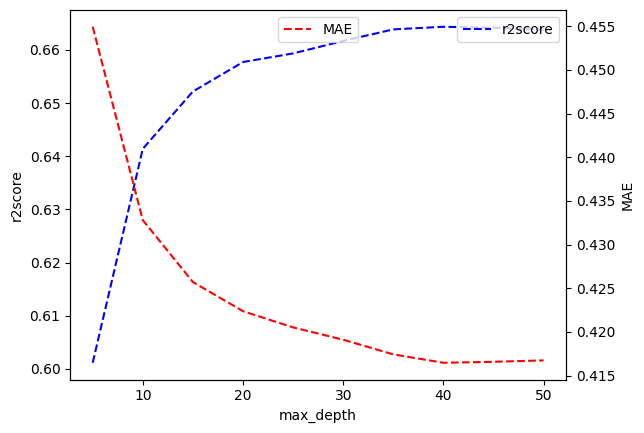

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(RFRegression_results['n_estimators'], RFRegression_results['r2score'], 'b--')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(RFRegression_results['n_estimators'], RFRegression_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center")
plt.show()

In [ ]:
# Valor verdadeiro vs. valor previsto para o modelo de regressão de floresta aleatória mais adequado

Text(0, 0.5, 'Valores Previstos [Potência]')

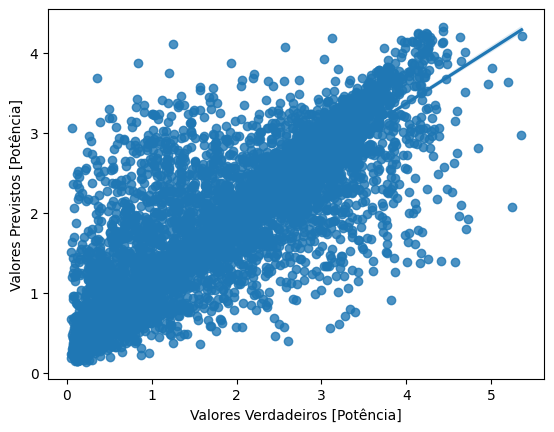

In [ ]:
sns.regplot(x=y_test, y= RandomForestRegressor(n_estimators = 50, random_state = 0).fit(x_train, y_train).predict(x_test))
plt.xlabel('Valores Verdadeiros [Potência]')
plt.ylabel('Valores Previstos [Potência]')

In [ ]:
# (PASSO 17) COMPARANDO OS DIFERENTES MODELOS DE REGRESSÃO
#


In [ ]:
# Montando os Parametros para comparação entre os três algoritmos
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(max_depth = 10,  random_state = 100)
reg3 = RandomForestRegressor(n_estimators = 40, random_state = 100)

In [ ]:
# Treinandoos os Parametros para comparação entre os três algoritmos
reg1.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=100)

In [ ]:
# Prevendo os Parametros para comparação entre os três algoritmos
pred1 = reg1.predict(x_test[:20])
pred2 = reg2.predict(x_test[:20])
pred3 = reg3.predict(x_test[:20])

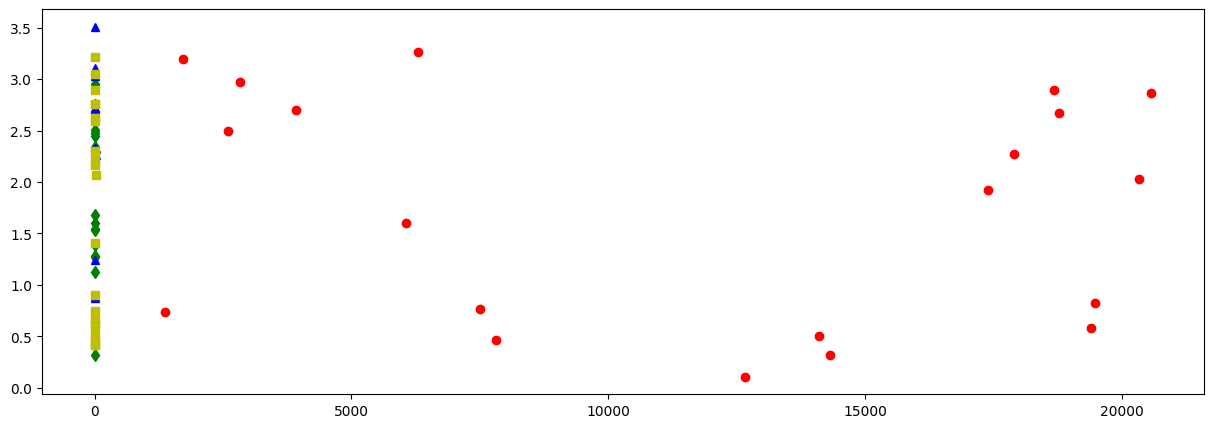

In [ ]:
#
plt.figure(figsize=(15,5))
plt.plot(pred1, 'gd', label='LinearRegression')
plt.plot(pred2, 'b^', label='DecisionTreeRegressor')
plt.plot(pred3, 'ys', label='RandomForestRegressor')
plt.plot(y_test[:20], 'ro', label = 'True value')


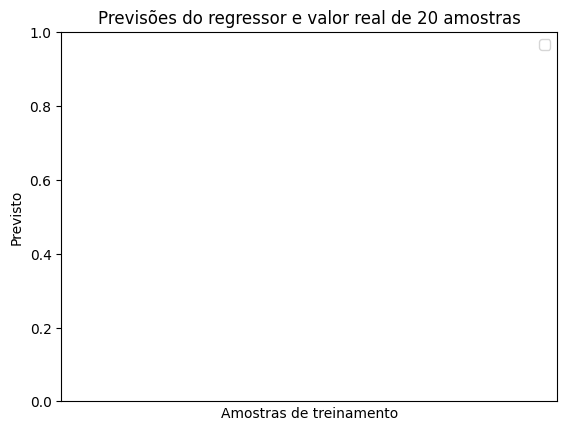

In [ ]:
#
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Previsto')
plt.xlabel('Amostras de treinamento')
plt.legend(loc="best")
plt.title('Previsões do regressor e valor real de 20 amostras')
plt.show()


In [ ]:
ereg = VotingRegressor([("lr", reg1), ("dt", reg2), ("rf", reg3)])
ereg.fit(x,y)
print(ereg.fit(x, y).predict(x))

[0.35291107 0.16053092 0.33286559 ... 1.97754985 2.15589565 1.64555159]


In [ ]:
#
###	Fazendo Previsões
#

# Agora usaremos cada um dos regressores para fazer as 20 primeiras previsões.

In [ ]:
xt = x[:20]
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

In [ ]:
#
### Trace os resultados
#
# Por fim, visualizaremos as 20 previsões. As estrelas vermelhas mostram a previsão média feita por VotingRegressor.


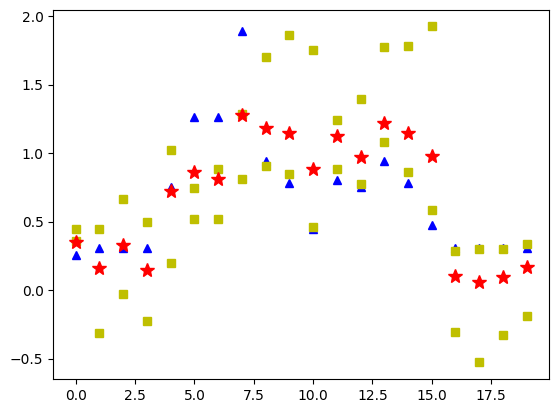

In [ ]:
plt.figure()
plt.plot(pred1, "ys", label="LinearRegression")
plt.plot(pred2, "b^", label="DecisionTreeRegressor")
plt.plot(pred3, "ys", label="RandomForestRegressor")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

<ipython-input-24-b14df83a8dc3>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


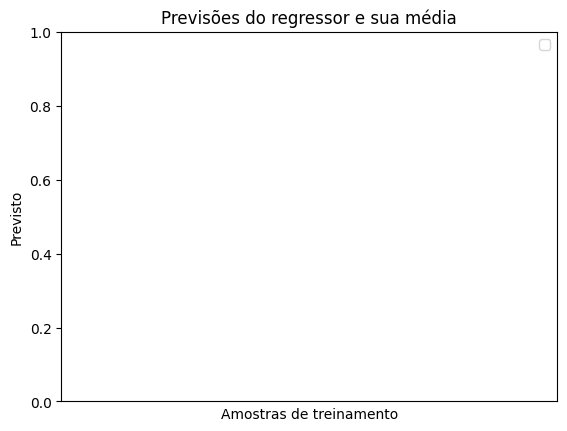

In [24]:
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Previsto")
plt.xlabel("Amostras de treinamento")
plt.legend(loc="best")
plt.title("Previsões do regressor e sua média")

plt.show()

In [ ]:
#################### ANÁLISE DAS MÉTRICAS

# Quanto menor o erro na métrica melhor o Algoritmo para modelar o Dataset

# Implicações para o uso das métricas em Algoritmo de Regressão:

# MAE <= RMSE. O RMSE sempre resultará em valor maior que o MAE (no mundo real).
# Para erros uniformes RMSE = MAE.
# RMSE <= MAE * srqt(n), em que n é o número de elementos da amostra de teste.

# A diferença entre as métricas é maior quando todo o erro da previsão está em uma única amostra. Então RMSE <= MAE * sqrt(n).
# "Concentrando-se no limite superior, isso significa que o RMSE tem uma tendência a ser cada vez maior que o MAE
# à medida que o tamanho da amostra de teste aumenta."

#### LINE REGRESSIN: RMSE = 0.7680734593277513 e MAE =  0.6395469925147521 e R2 Score =  0.46517300681773344

	# RMSE =  [0.7680734593277513]
	# MAE =  0.6395469925147521
	# R2 Score =  0.46517300681773344

#### DECISIO TREE REGRESSION: RMSE = 0.75 MAE = 0.50 e R2 Score =  0.55 para uma profundidade de 10

	#    max_depth  RMSE   MAE  r2score
	# 0          5  0.77  0.57     0.53
	# 1         10  0.75  0.50     0.55
	# 2         15  0.84  0.52     0.44
	# 3         20  0.87  0.53     0.40
	# 4         25  0.89  0.55     0.38
	# 5         30  0.89  0.55     0.38
	# 6         35  0.89  0.55     0.37
	# 7         40  0.89  0.55     0.37
	# 8         45  0.89  0.55     0.38
	# 9         50  0.89  0.55     0.37


#### RANDOM FOREST REGRESSION: RMSE = 0.644 e MAE = 0.423 e R2 Score =  0.673 para uma profundidade de 45

	#   n_estimators   RMSE    MAE  r2score
	# 0             5  0.708  0.463    0.605
	# 1            10  0.674  0.442    0.642
	# 2            15  0.663  0.435    0.654
	# 3            20  0.656  0.430    0.661
	# 4            25  0.652  0.427    0.664
	# 5            30  0.649  0.426    0.668
	# 6            35  0.648  0.425    0.669
	# 7            40  0.646  0.424    0.671
	# 8            45  0.644  0.423    0.673
	# 9            50  0.644  0.423    0.673


#### 	Conclusões:
#
# Entre os modelos estudados neste trabalho, o modelo de regressão RANDOM FOREST REGRESSION apresenta maior precisão na previsão de erros.
#




In [ ]:
# DADOS ESTATITISCOS DA COLUNA Season
#
print(df['PolyPwr'].describe())
#


count    21045.000000
mean        12.978583
std          7.123255
min          0.257330
25%          6.404570
50%         13.798700
75%         18.863650
max         34.285020
Name: PolyPwr, dtype: float64


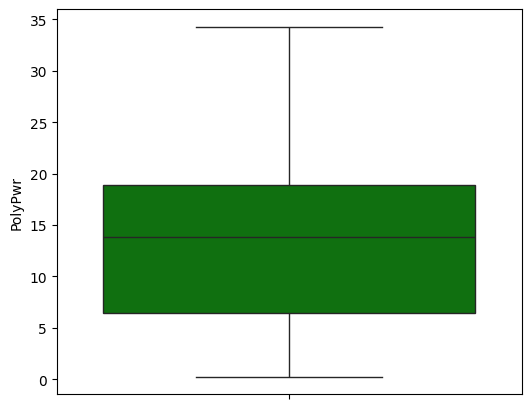

In [25]:
plt.figure(figsize=(6, 5))
sns.boxplot(df['PolyPwr'], color='g');
plt.show()